$$
\text{Essential Mathematical Methods for Engineers}
$$
$$
\text{Lecture 1a:}
$$
$$
\text{Signal representation and system response}
$$

## Fourier Series

### Trigonometric Fourier series

- we can represent any finite power periodic signal $x(t)$ with a period $T$as a sum of sine and cosine waves:

$
x(t) = \frac{A_0}{2} + \sum_{n=1}^\infty A_n \cos(n \omega_0 t) + B_n \sin(n \omega_0 t)
$


$ \omega_0 $ is:

- **$ \omega_0 $**, the **fundamental angular frequency** is measured in **radians per second** $(\text{rad/s})$.
  
  Since $ \omega_0 = 2\pi f_0 $, the factor of $ 2\pi $ converts the frequency from cycles per second (Hertz) to radians per second. One complete cycle corresponds to $ 2\pi $ radians.

- $ f_0 = \frac{1}{T} $ the **fundamental frequency**. is measured in **Hertz (Hz)**, which is equivalent to **cycles per second** $(\text{s}^{-1})$.

Therefore:
- $ f_0 $ represents how many complete cycles occur per second.
- $ \omega_0 $ represents how many radians of phase change occur per second.

- This frequency $ f_0 $ corresponds to the **lowest harmonic** in the sum, with higher harmonics being integer multiples of $ f_0 $.

### Example
Evaluate the Fourier series of the square wave (a)

In [1]:
using Plots
using Printf

In [2]:
# Define the function x(t) using a finite number of terms in the Fourier series
function x(t, N_max)
    x_val = 0.0  # Initialize the sum
    for n in 1:N_max
        # Compute the Fourier coefficient for each n
        coeff = (2 / (n * π)) * (1 - cos(n * π))
        # Add the term for this value of n to the sum
        x_val += coeff * sin(n * π * t)
    end
    return x_val
end

x (generic function with 1 method)

In [3]:
# Define time range and parameters
t_vals = range(0, stop=2, length=500)  # Time values from 0 to 2
N_max = 400  # Number of terms in the Fourier series

# Compute x(t) for the given time range and N_max
x_vals = [x(t, N_max) for t in t_vals];

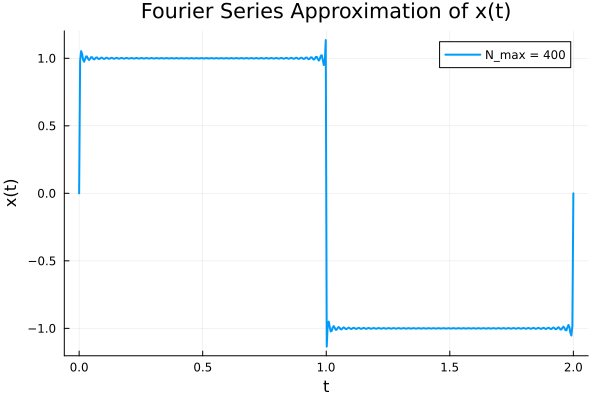

In [4]:
# Plot the result
plot(t_vals, x_vals
    , label="N_max = $N_max"
    , title="Fourier Series Approximation of x(t)"
    , xlabel="t", ylabel="x(t)"
    , legend=:topright, linewidth=2
    , grid = :true
)

### Complex phasors

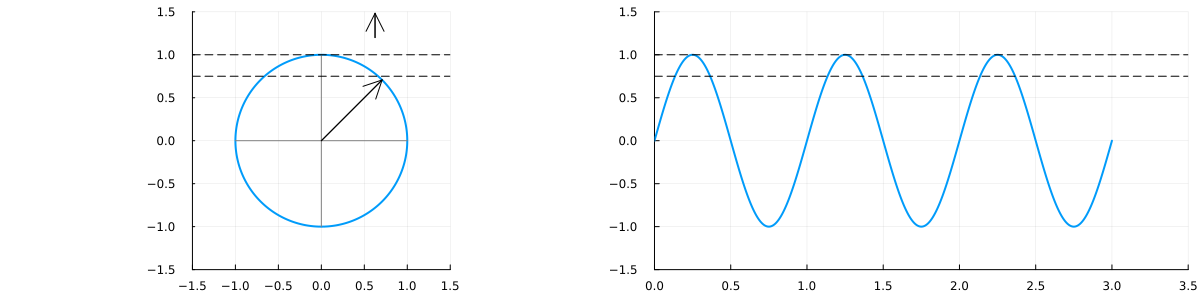

In [5]:
using Plots

# Parameters
A = 1.0          # Amplitude
ω₀ = 2π          # Angular frequency (rad/s)
T = 2π / ω₀      # Period (based on angular frequency)
t = range(0, stop=3T, length=500)  # Time range

# Complex phasor in the form A * exp(j*ω₀*t) with phase shift
phasor = A * exp.(im .* (ω₀ .* t .- π/2))  # Corrected broadcasting with .- and .*

# Real part of the phasor (cosine wave)
cos_wave = real(phasor)

# Set the current time for the arrows
t_arrow = T / 8  # Example time for arrow
phasor_arrow = A * exp(im * ω₀ * t_arrow)

# Plot phasor (rotating vector)
p1 = plot(real(phasor), imag(phasor), label="Phasor (Rotating Vector)", linewidth=2, legend=:topright, xlims=(-1.5, 1.5), ylims=(-1.5, 1.5), aspect_ratio=:equal)
plot!(p1, real(phasor), zero(t), linestyle=:dash, label="", color=:gray)
plot!(p1, zero(t), imag(phasor), linestyle=:dash, label="", color=:gray)

# Add arrow for the phasor using quiver
quiver!([0], [0], quiver=([real(phasor_arrow)], [imag(phasor_arrow)]), label="", color=:black)
# Add arrow for the real part (projection on the real axis)
quiver!([t_arrow+.5], [1.2], quiver=([0], [0.4*real(phasor_arrow)]), xlabel="omega", color=:black)


# Plot the real part (cosine projection)
p2 = plot(t, cos_wave
    , label="Cosine Projection", linewidth=2, legend=:topright
)
plot!(p2, zero(t), zero(t)
    , color=:black, label=""
    , xlim = (0,3.5), ylim = (-1.5,1.5)
)

# Add dashed horizontal line at y = 1
hline!(p1, [1], linestyle=:dash, label="", color=:black)
hline!(p2, [1], linestyle=:dash, label="", color=:black)

# Add dashed horizontal line at y = 0.75
hline!(p1, [0.75], linestyle=:dash, label="", color=:black)
hline!(p2, [0.75], linestyle=:dash, label="", color=:black)

# Show the plots side by side
plot!(p1, p2, layout = (1, 2), size=(1200,300), legend = :false)